In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
from scipy.stats import ttest_ind

from numba import njit, jit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [116]:
data = pd.read_table('001_0.0.txt',sep='\s+', engine='python')

In [117]:
data.head()

,"""V1""","""V2""","""V3""","""V4""","""V5""","""V6""","""V7""","""V8""","""V9""","""V10""",...,"""V52""","""V53""","""V54""","""V55""","""V56""","""V57""","""V58""","""V59""","""V60""","""V61"""
"""1""","""SYMBOL""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""",...,"""T""","""T""","""T""","""T""","""T""","""T""","""T""","""T""","""T""","""T"""
"""2""","""1""","""5247.49293259654""","""4790.54474507723""","""6238.85854787794""","""4622.2847111511""","""5185.89894692586""","""4744.07759587077""","""4907.9088687298""","""6126.45317226705""","""5782.50977148308""",...,"""5144.13220413024""","""4845.25054106637""","""5636.52470402481""","""4099.08550137482""","""6116.7396852638""","""4466.52921934533""","""4863.46965654675""","""4583.59932372666""","""5309.95985018772""","""5567.68800129938"""
"""3""","""2""","""2268.14564922278""","""2554.97834095614""","""2769.27804074741""","""2838.59005017063""","""2847.1272359175""","""2784.9254797675""","""2873.40604941688""","""2562.75962839876""","""3112.68780894187""",...,"""2577.107048147""","""2617.91058347744""","""2792.46404274922""","""2878.56996592038""","""2752.0806355308""","""2614.70698853029""","""2384.03855239084""","""3053.39223594975""","""2882.97916512409""","""2765.7703703236"""
"""4""","""3""","""8652.69796532876""","""5351.96343672135""","""10030.6833773122""","""8031.62320734749""","""7918.48901573157""","""8670.5750391591""","""5852.19358000852""","""7352.91866171314""","""5901.23393933602""",...,"""8368.42665739805""","""5292.39176476355""","""8630.80501731622""","""10385.2551690723""","""7317.20009390225""","""9011.07927586003""","""9403.40986911573""","""10925.2429621078""","""9593.08864107501""","""4369.36951341033"""
"""5""","""4""","""6328.53610073257""","""5705.31457733906""","""6047.97222130416""","""7625.82640777647""","""6793.896261646""","""5979.96163541166""","""5921.40126057513""","""5487.72541286272""","""5644.75357736126""",...,"""5136.97029665602""","""6934.38075618879""","""6005.6700149895""","""5206.93541098539""","""2876.6230467221""","""4078.72059363209""","""6084.97488417646""","""6036.78289298561""","""5607.39452268223""","""4404.77961979332"""


In [118]:
data.shape

(5001, 61)

### Предобработка

In [119]:
data.columns = [x[1 : - 1] for x in data.columns]

In [120]:
plat_1 = []
plat_2 = []

for x in data.columns:
    
    if(data[x]['"1"'] == '"SYMBOL"'):
        continue
        
    if(data[x]['"1"'] == '"N"'):
        plat_1.append(x)
        
    if(data[x]['"1"'] == '"T"'):
        plat_2.append(x)

In [121]:
data.drop(['"1"'], inplace=True)

In [122]:
data.drop(['V1'], inplace=True, axis = 1)

In [123]:
data.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61
"""2""","""5247.49293259654""","""4790.54474507723""","""6238.85854787794""","""4622.2847111511""","""5185.89894692586""","""4744.07759587077""","""4907.9088687298""","""6126.45317226705""","""5782.50977148308""","""5635.30249020014""",...,"""5144.13220413024""","""4845.25054106637""","""5636.52470402481""","""4099.08550137482""","""6116.7396852638""","""4466.52921934533""","""4863.46965654675""","""4583.59932372666""","""5309.95985018772""","""5567.68800129938"""
"""3""","""2268.14564922278""","""2554.97834095614""","""2769.27804074741""","""2838.59005017063""","""2847.1272359175""","""2784.9254797675""","""2873.40604941688""","""2562.75962839876""","""3112.68780894187""","""2625.52183135069""",...,"""2577.107048147""","""2617.91058347744""","""2792.46404274922""","""2878.56996592038""","""2752.0806355308""","""2614.70698853029""","""2384.03855239084""","""3053.39223594975""","""2882.97916512409""","""2765.7703703236"""
"""4""","""8652.69796532876""","""5351.96343672135""","""10030.6833773122""","""8031.62320734749""","""7918.48901573157""","""8670.5750391591""","""5852.19358000852""","""7352.91866171314""","""5901.23393933602""","""8703.95447088831""",...,"""8368.42665739805""","""5292.39176476355""","""8630.80501731622""","""10385.2551690723""","""7317.20009390225""","""9011.07927586003""","""9403.40986911573""","""10925.2429621078""","""9593.08864107501""","""4369.36951341033"""
"""5""","""6328.53610073257""","""5705.31457733906""","""6047.97222130416""","""7625.82640777647""","""6793.896261646""","""5979.96163541166""","""5921.40126057513""","""5487.72541286272""","""5644.75357736126""","""4760.61756508233""",...,"""5136.97029665602""","""6934.38075618879""","""6005.6700149895""","""5206.93541098539""","""2876.6230467221""","""4078.72059363209""","""6084.97488417646""","""6036.78289298561""","""5607.39452268223""","""4404.77961979332"""
"""6""","""1970.96489433596""","""5273.34367072281""","""3463.83397187066""","""6060.4279118646""","""7258.05155623329""","""22.2396484034698""","""3309.46313817282""","""3518.66366817028""","""2232.26405789472""","""2696.33231152938""",...,"""4835.6081822887""","""6502.44188749528""","""5045.53700840147""","""5549.34972115839""","""3970.36883912883""","""3387.29938610946""","""5866.61192691756""","""3748.98410418282""","""5393.25538076526""","""4979.22901187222"""


In [124]:
data = data.apply(lambda S:S.str.strip('"'))

In [132]:
data = data.astype(float)

In [133]:
data.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61
"""2""",5247.492933,4790.544745,6238.858548,4622.284711,5185.898947,4744.077596,4907.908869,6126.453172,5782.509771,5635.302490,...,5144.132204,4845.250541,5636.524704,4099.085501,6116.739685,4466.529219,4863.469657,4583.599324,5309.959850,5567.688001
"""3""",2268.145649,2554.978341,2769.278041,2838.590050,2847.127236,2784.925480,2873.406049,2562.759628,3112.687809,2625.521831,...,2577.107048,2617.910583,2792.464043,2878.569966,2752.080636,2614.706989,2384.038552,3053.392236,2882.979165,2765.770370
"""4""",8652.697965,5351.963437,10030.683377,8031.623207,7918.489016,8670.575039,5852.193580,7352.918662,5901.233939,8703.954471,...,8368.426657,5292.391765,8630.805017,10385.255169,7317.200094,9011.079276,9403.409869,10925.242962,9593.088641,4369.369513
"""5""",6328.536101,5705.314577,6047.972221,7625.826408,6793.896262,5979.961635,5921.401261,5487.725413,5644.753577,4760.617565,...,5136.970297,6934.380756,6005.670015,5206.935411,2876.623047,4078.720594,6084.974884,6036.782893,5607.394523,4404.779620
"""6""",1970.964894,5273.343671,3463.833972,6060.427912,7258.051556,22.239648,3309.463138,3518.663668,2232.264058,2696.332312,...,4835.608182,6502.441887,5045.537008,5549.349721,3970.368839,3387.299386,5866.611927,3748.984104,5393.255381,4979.229012


### Код Стьюдента

In [126]:
rng = np.random.default_rng()

In [127]:
def get_splitted_columns(columns):
    shuffled = rng.permutation(columns)
    columns_1 = shuffled[:len(columns) // 2]
    columns_2 = shuffled[len(columns) // 2:]
    return columns_1, columns_2

In [128]:
def split_for_f(gene, columns_1, columns_2):
    sample_1 = gene[columns_1].values
    sample_2 = gene[columns_2].values
    return f(sample_1, sample_2)

In [129]:
# @njit
def f(sample_1, sample_2):
    sign = np.sign(sample_1.mean() - sample_2.mean())
    p_value = ttest_ind(sample_1, sample_2)[1]
    return sign * (-np.log1p(p_value))

In [130]:
def calc_corr(data, fixed_cols, splitting_cols):
    cols_1, cols_2 = get_splitted_columns(splitting_cols)
    
    f_1 = data.apply(split_for_f, args=(fixed_cols, cols_1), axis=1)
    f_2 = data.apply(split_for_f, args=(fixed_cols, cols_2), axis=1)
    
    return f_1.corr(f_2)

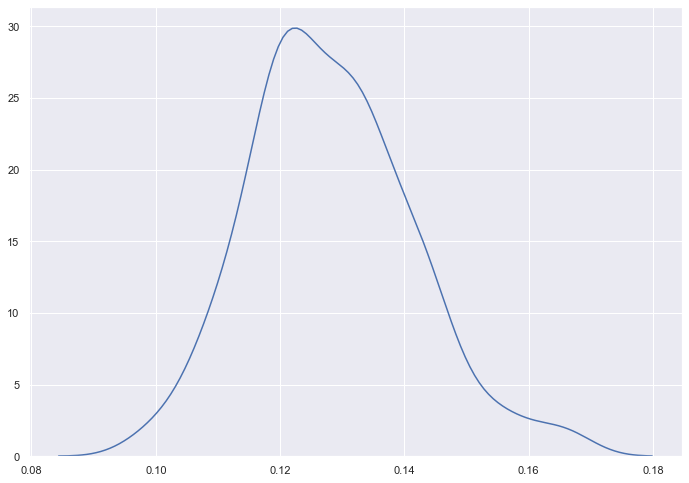

In [134]:
corrs = [calc_corr(data, plat_1, plat_2) for i in range(100)]
            
plt.figure()
sns.distplot(corrs, hist=False)